# SALES PREDICTION USING Scikit-Learn
 I like to import all the necessary libraries on top of the notebook to keep everything organized. Import the following.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score

# Read the data
Assuming that you downloaded the data set, place it in a data directory within your project folder. Then, read the data like so:

In [25]:
data = pd.read_csv("Advertising.csv")

In [26]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [27]:
print(data.shape)
print(data.columns)
type(data)

(200, 4)
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


pandas.core.frame.DataFrame

C:\Users\Sambhu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


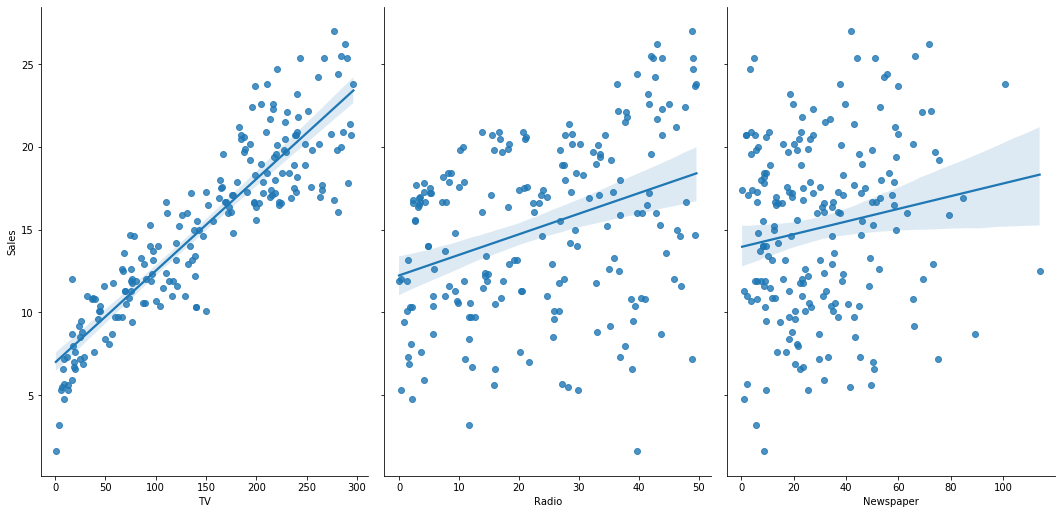

In [28]:
#plotting realtonship to understand relationship between features and result
sns.pairplot(data,x_vars=data.columns[:3],y_vars=data.columns[3:],size=7,aspect=0.7,kind='reg')

In [29]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Linear Regression With Sales Prediction Project

In [30]:
feature_cols=data.columns[:3]
#feature_cols = ['TV','radio','newspaper']   
X=data[feature_cols]

result_cols= data.columns[3:]
#result_cols= ['sales']
Y=data[result_cols]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.4)
#default size is test_size=0.25 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(120, 3)
(120, 1)
(80, 3)
(80, 1)


In [31]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

#formula of linear regression is y = bias + [coef1]x1 + [coef2]x2 + [coef3]x3... 

print("linear regression bias or intercept   => ",linreg.intercept_)   #intercept=bias
print("linear regression coefficient         => ",linreg.coef_)
print("feature columns                       => ",feature_cols)

linear regression bias or intercept   =>  [4.65921398]
linear regression coefficient         =>  [[ 0.05296821  0.11717789 -0.00354782]]
feature columns                       =>  Index(['TV', 'Radio', 'Newspaper'], dtype='object')


In [32]:
y_hat = linreg.predict(x_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_hat)) )

#the less score the better

1.801242094703961


In [37]:
# Root Mean Square error wth TV and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','Radio']   
    X=data[feature_cols]
    Y=data.Sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    linreg = LinearRegression()
    linreg.fit(x_train,y_train)
    y_hat = linreg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6593516403277175

In [39]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','Radio','Newspaper']   
    X=data[feature_cols]
    Y=data.Sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6783382922957857

In [40]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','Radio','Newspaper']   
    X=data[feature_cols]
    Y=data.Sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    linreg = LinearRegression()
    linreg.fit(x_train,y_train)
    y_hat = linreg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.847908802222276

# using cross validation to check best features

In [42]:
#all features
feature_cols = ['TV','Radio','Newspaper']   
X=data[feature_cols]
Y=data.Sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

# the less the better

1.658502109162588
